# Importing related Libraries

In [36]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Store the dataset into the Dataframe

In [37]:
data=pd.read_csv('Churn_Modelling.csv')

### UNDERSTANDING AND DESCRIBING THE DATA

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [39]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [40]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# CHECKING THE UNIQUE AND NULL VALUES

In [41]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [42]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [43]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [44]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

# EDA ANALYSIS

(array([7963.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2037.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

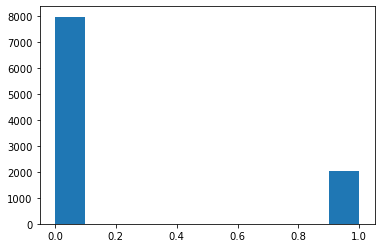

In [45]:
plt.hist(data['Exited'])

<AxesSubplot:title={'center':'Years of staying in the city'}, ylabel='Exited'>

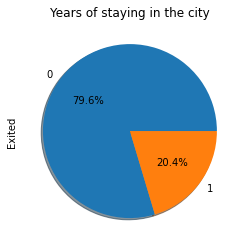

In [46]:
data["Exited"].value_counts().plot.pie(title = "Years of staying in the city", autopct = "%1.1f%%", shadow = True)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

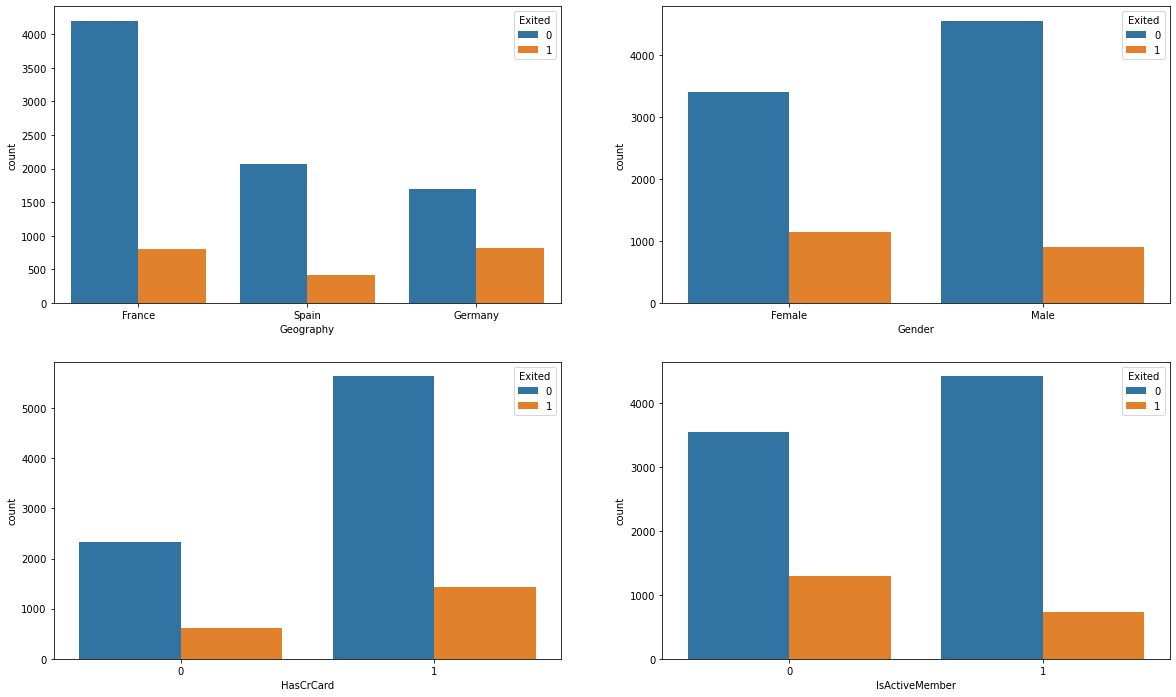

In [47]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = data, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = data, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = data, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data, ax=axarr[1][1])

<AxesSubplot:xlabel='Exited', ylabel='Age'>

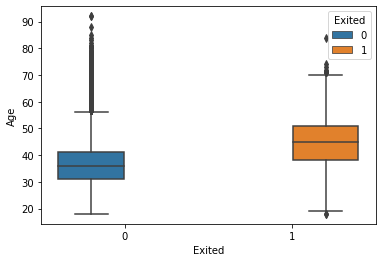

In [48]:
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = data)

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

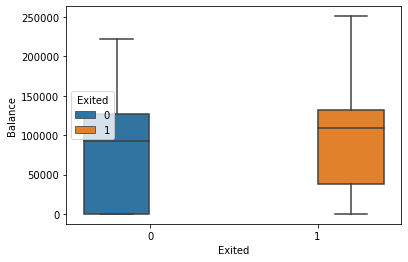

In [49]:
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = data)

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

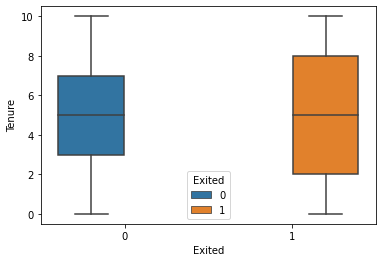

In [50]:
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = data)

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

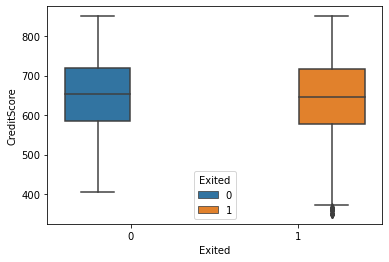

In [51]:
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = data)

# FEATURE ENGINEERING

In [52]:
data1=data.copy()

In [53]:
data1['BalanceSalaryRatio'] = data1.Balance/data1.EstimatedSalary


In [54]:
data1['TenureByAge'] =data1.Tenure/(data1.Age)


In [55]:
data1['CreditScoreGivenAge'] = data1.CreditScore/(data1.Age)


In [56]:
def gend(val):
    if val == 'Male':
        return 1
    else:
        return 0

data1['Gender'] = data1['Gender'].apply(gend)

In [57]:
data1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0,0.000000,0.128205,19.769231
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0,0.564108,0.285714,14.742857
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1,0.000000,0.194444,19.694444
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,0.808230,0.071429,18.380952


# FEATURE SCALING

In [58]:
from sklearn.preprocessing import MinMaxScaler,minmax_scale
data1['Age'] = minmax_scale(data1['Age'])
data1['EstimatedSalary'] = minmax_scale(data1['EstimatedSalary'])
data1['Balance'] = minmax_scale(data1['Balance'])
data1['CreditScore'] = minmax_scale(data1['CreditScore'])
data1['BalanceSalaryRatio'] = minmax_scale(data1['BalanceSalaryRatio'])
data1['TenureByAge'] = minmax_scale(data1['TenureByAge'])
data1['CreditScoreGivenAge'] = minmax_scale(data1['CreditScoreGivenAge'])

In [59]:
data1['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

# ONE HOT ENCODNG

In [60]:
df_geo = data1['Geography']
df_geo = pd.get_dummies(df_geo,drop_first=True)
data1.drop(['Geography'],axis=1,inplace=True)
df_final = pd.concat([data1,df_geo],axis=1)

In [61]:
df_final.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Germany,Spain
0,0.538,0,0.324324,2,0.000000,1,1,1,0.506735,1,0.000000,0.085714,0.235083,0,0
1,0.516,0,0.310811,1,0.334031,1,0,1,0.562709,0,0.000070,0.043902,0.237252,0,1
2,0.304,0,0.324324,8,0.636357,3,1,0,0.569654,1,0.000132,0.342857,0.168807,0,0
3,0.698,0,0.283784,1,0.000000,2,0,0,0.469120,0,0.000000,0.046154,0.310859,0,0
4,1.000,0,0.337838,2,0.500246,1,1,1,0.395400,0,0.000150,0.083721,0.354739,0,1
5,0.590,1,0.351351,8,0.453394,2,1,0,0.748797,1,0.000072,0.327273,0.233203,0,1
6,0.944,1,0.432432,7,0.000000,2,1,1,0.050261,0,0.000000,0.252000,0.275574,0,0
7,0.052,0,0.148649,4,0.458540,4,1,0,0.596733,1,0.000091,0.248276,0.192911,1,0
8,0.302,1,0.351351,4,0.566170,2,0,1,0.374680,0,0.000179,0.163636,0.155340,0,0
9,0.668,1,0.121622,2,0.536488,1,1,1,0.358605,0,0.000177,0.133333,0.487160,0,0


In [62]:
X = df_final.drop('Exited',axis=1)
y = df_final['Exited']

# APPLYING SMOTE

In [63]:
from imblearn.over_sampling import SMOTE
X_res,y_res = SMOTE().fit_resample(X,y)

# SPLITTING OF DATASET

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=42)

# CHOOSING BEST MODEL

In [65]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X_train,y_train)

LogisticRegression(random_state=0)

# EVALUATION OF MODEL

In [66]:
from sklearn.metrics import classification_report,confusion_matrix
pred1 = LR.predict(X_test)
print(classification_report(y_test,pred1))
print()
print(confusion_matrix(y_test,pred1))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72      2426
           1       0.71      0.73      0.72      2352

    accuracy                           0.72      4778
   macro avg       0.72      0.72      0.72      4778
weighted avg       0.72      0.72      0.72      4778


[[1706  720]
 [ 624 1728]]


In [67]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB()

In [68]:
from sklearn.metrics import classification_report,confusion_matrix
pred2 = NB.predict(X_test)
print(classification_report(y_test,pred2))
print()
print(confusion_matrix(y_test,pred2))

              precision    recall  f1-score   support

           0       0.58      0.96      0.72      2426
           1       0.87      0.29      0.44      2352

    accuracy                           0.63      4778
   macro avg       0.73      0.63      0.58      4778
weighted avg       0.72      0.63      0.58      4778


[[2323  103]
 [1660  692]]


In [69]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

RandomForestClassifier()

In [70]:
from sklearn.metrics import classification_report,confusion_matrix
pred = forest.predict(X_test)
print(classification_report(y_test,pred))
print()
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2426
           1       0.86      0.88      0.87      2352

    accuracy                           0.87      4778
   macro avg       0.87      0.87      0.87      4778
weighted avg       0.87      0.87      0.87      4778


[[2094  332]
 [ 283 2069]]


# THE BEST MODEL IS RANDOMFOREST FOR THIS CLASSIFICATION DATASET WHICH GIVES ACCURACY AROUND 87%